### Classification & Recommendation Evaluation Metrics

분류 모델은 예측한 전체 관측치 중에서 몇 개나 정확히 분류했는가를 평가하는 것이 주요 평가 지표다.

**혼동 행렬 Confusion Matrix**  
![confusion_matrix](https://miro.medium.com/v2/resize:fit:1218/1*jMs1RmSwnYgR9CsBw-z1dw.png)

**Accuracy, Error rate, Precision, Sensitivity, Specificity, F-score**  

**정확도 Accuracy** 는 전체 관측치 데이터 중에서 '1'은 '1'로, '0'은 '0'으로 모델이 올바르게 분류한 비중을 뜻한다. 즉 모델이 얼마나 정확하게 분류를 하는지를 나타내는 기준값이 정확도다.  
$$Accuracy = \frac{(TP+TN)}{(TP+TN+FP+FN)}$$  

**오분류율 Error rate** Misclassification rate라고도 불리는, 전체 관측치 데이터 중에서 모델이 잘못 분류한 비중을 뜻한다.  
$$Error rate = \frac{(FP+FN)}{(TP+TN+FP+FN)}$$  

**정밀도 Precision** 는 '1'으로 예측하여 분류한 관측치 중에서 실젯값도 '1'인 비중을 의미한다. 모델이 실제 '1'을 제대로 분류하는 성능이 얼마나 우수한지를 확인할 때 정밀도 기준값을 확인한다.  
$$Precision = \frac{TP}{(TP+FP)}$$  

대부분의 학습 및 예측 데이터는 '1'로 분류된 관측치의 비중이 적다. 상황에 따라서는 클래스 불균형을 없애기 위해 Under Sampling이나 Oversampling 등을 통해 '1'과 '0' 클래스의 비율을 비슷하게 맞춰주기도 하지만, 그대로 분류 예측을 하기도 한다. 그럴 경우, 모델이 무조건 '0'으로 예측하게 할 경우 모델의 정확도가 높게 나오는 정확성 역설(Accuracy Paradox) 현상이 나타난다. ex) 1과 0의 비율이 2:8일 경우, 모델이 모든 예측값을 0으로 할 경우, 정확성은 80%가 나옴.  
또한 모델이 단 하나의 관측치만 '1'로 분류했고 그 관측치의 실젯값도 '1'이라면 그 모델의 정밀도는 100%가 된다. 그렇기 때문에 정확도와 정밀도만으로 분류 모델의 성능을 평가하는 것은 위험하다.  

**민감도 Sensitivity**  
재현율(Recall)로도 불리는 민감도는 실제 '1'인 관측치 중에서 모델이 정확히 '1'로 예측하여 분류한 비중을 뜻한다. 모델의 정밀도가 아무리 우수하더라도 실제 '1'인 관측치를 너무 적게 찾아낸다면 좋은 모델이라 할 수 없다. 일반적으로 50% 이상의 민감도를 유지하는 것이 좋다.  
$$Sensitivity = \frac{TP}{(TP+FN)}$$  

**특이도 Specificity**는 '0'으로 예측하여 분류한 관측치 중에서 실젯값도 '0'인 비중을 의미한다. 보통 전체 관측치 중에서 '1'보다 '0'이 많은 비중을 차지하기 때문에 특이도는 높게 나오는 편이다. '1'과 '0'의 비중이 비슷하거나, '0'에 대한 분류가 중요할 경우에 특이도 기준값을 확인한다.  
$$Specificity = \frac{TN}{(TN+TP)}$$  

**F-Score**는 정밀도와 민감도를 동시에 고려한 분류 모델 성능 평가 기준이다. F-Score는 0과 1 사이의 값을 값는다. 정밀도와 민감도는 서로 trade-off 관계다. 정밀도가 증가하면 민감도가 감소하고, 민감도가 증가하면 정밀도가 감소하게 된다. 정밀도를 높인다는 것은 실제로 '1'일 것이 거의 확실한 관측치만 '1'로 예측하여 분류한다는 것이기 때문에, 전체 실제 '1'중에 '1'로 분류되는 비중인 민감도는 감소할 수밖에 없다.  
따라서 정밀도와 민감도 둘의 조화평균을 한 기준값을 사용하여 보다 객관적으로 분류모델을 평가할 수 있다. F-score는 정밀도와 민감도가 한쪽으로 치우치지 않을 때 상대적으로 높은 값을 갖는다.  
$$F-score = \frac{(1+\beta^2)\times(precision \times sensitivity)}{(\beta^2 x precision)+sensitivity} $$  
beta 값은 조화평균의 가중치로, 정밀도와 민감도의 중요도를 동일하게 본다면 beta에 1을 대입해준다. 이를 F1-score라 하며 가장 많이 쓰이는 F-score 기준값이다. 만약 정밀도를 중요시한다면 beta값을 1 미만으로, 민감도를 중요시한다면 beta 값을 1 초과로 설정하면 된다.

**향상도 테이블 Lift table, 향상도 차트 Lift Chart 그리고 향상도 곡선 Lift curve**  
정확도, 오분류율, 정밀도 등은 분류 임계치인 threshold 값에 따라 변화한다. 향상도 테이블과 향상도 곡선은 전체 threshold 값에 대한 모델을 평가하는 지표로 사용할 수 있다. 또한 적정한 threshold 값을 선정할 때에도 사용할 수 있는 유용한 모델 평가 기준이다.  
향상도 Lift란, 전체 관측치 중에서 실제 '1'의 비율보다, 모델을 통해 '1'로 예측한 관측치 중 실제 '1'의 비율이 얼마나 더 높은지를 나타낸다.

**ROC 곡선과 AUC**  
혼동행렬을 활용한 분류모델 평가지표 중 ROC(Receiver Operator Characteristic) 곡선과 AUC(Area Under Curve)가 이 평가 방법은 객관적으로 모델 비교 및 평가를 할 수 있고 임곗값인 threshold를 결정하는 데에 유용하게 사용할 수 있다는 장점이 있다.  
ROC 곡선의 접근 방식은 향상도 테이블과 유사하다. 임곗값 threshold를 1에서 0으로 조정해가면서 민감도(True accept rate)와 1-특이도(False accept rate) 값을 2차원 지표에서 찍어서 그래프를 그린다. 민감도는 전체 실제 '1'값 중에서 '1'로 분류된 비율이기 때문에, 모델 임곗값이 1에서 0으로 내려갈수록 증가한다. 그러다가 임곗값이 0이 될 때 민감도는 100%가 된다(전체 데이터를 '1'로 분류하기 때문). 그런데 1-특이도는 전체 실제 '0'값 중에서 '1'로 잘못 분류된 비율이므로 최소화해야 하는 값인데, 임곗값이 낮아질수록 전부 '1'로 분류하기 때문에 증가한다. 즉,임곗값을 낮추면 더 많은 항목이 '1'로 분류되므로 민감도와 1-특이도가 모두 증가한다. ROC 곡선은 이러한 민감도와 1-특이도 값의 변화를 그래프로 그려서 분류 모델의 성능을 평가하는 것이다. 좋은 모델이라면 높은 threshold 구간에 실제 '1'값이 많이 몰려 있고, 낮은 구간에는 실제 '1'값이 희소할 것이다. 따라서 좋은 모델일수록 ROC 곡선은 좌측 상단에 수렴하게 된다. 
![roc](https://upload.wikimedia.org/wikipedia/commons/thumb/1/13/Roc_curve.svg/220px-Roc_curve.svg.png)  
곡선 그래프만으로 모델의 성능을 객관적으로 판단하기는 어렵다. 그래서 ROC 곡선을 수치로 계산한 AUC(Area Under Curve) 기준을 활용한다. AUROC(Area Under a ROC Curve)로도 불리며, ROC 곡선 아래의 면적 크기를 구한 것이다. 면적의 크기가 클수록 우수한 모델이며, 0.5는 랜덤 분류와 같은 성능이다.

**수익 곡선 Profit Curve**  
분류모델은 비용대비 효과의 불균형 문제가 존재한다. 단지 오분류율만을 계산함으로써 오분류의 가중치가 똑같다는 가정에서 발생하는 문제다. TP와 FP에 따른 손해를 수치화하여 분류 모델의 수익성을 최대화할 때 사용하는 것이 수익 곡선이다. 
![profit_curve](https://i.stack.imgur.com/fWWHh.jpg)

**Precision at k, Recall at K, MAP**  
추천 시스템을 통해 사용자가 추천을 받은 것들 중에서 얼마나 실제로 선택을 했는가를 통해 추천시스템의 성능 평가를 한다.  
Precision at k는 추천한 Top K 개의 항목 중 반응한 항목의 비율을 말한다.  
*Precision at k = k에서의 추천 항목 중 반응 항목의 수 / k에서의 추천 항목 수*  
Recall at k : 반응한 전체 항목 중 추천한 Top K 개의 항목에서 반응한 항목의 비율  
*Recall at k = k에서의 추천 항목 중 반응 항목의 수 / k에서의 추천 항목 수*  
추천 시스템의 또 다른 평가 방법으로 MAP(Mean Average Precision)가 있다. 본래는 검색 엔진 등의 문서 검색 결과를 평가하는 데 사용하는 방법이지만 추천시스템의 모델 평가 활용도가 가능하다. MAP은 사용자들이 반응했던 항목 구간들의 Precision들을 모두 평균을 낸 모델 평가척도다.

In [2]:
!pip install scikit-plot
import pandas as pd 
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import *
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
import scikitplot as skplt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import metrics

In [3]:
# https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease
df = pd.read_csv('../input/personal-key-indicators-of-heart-disease/2020/heart_2020_cleaned.csv')

In [5]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [6]:
# 데이터 전처리

df2 = pd.get_dummies(df, columns = ['HeartDisease','Smoking',
                                    'AlcoholDrinking','Stroke',
                                    'DiffWalking','Sex',
                                    'AgeCategory','Race',
                                    'Diabetic','PhysicalActivity',
                                    'GenHealth','Asthma',
                                    'KidneyDisease','SkinCancer']
                     ,drop_first=True)

# 숫자형 변수 분리
df_num = df[['BMI','PhysicalHealth','MentalHealth','SleepTime']]
df_nom = df2.drop(['BMI','PhysicalHealth','MentalHealth','SleepTime'],axis=1)

# 숫자형 변수 RobustScaler 적용
RobustScaler = RobustScaler()
df_robust = RobustScaler.fit_transform(df_num)

# 컬럼명 결합
df_num2 = pd.DataFrame(data=df_robust, columns=df_num.columns)

# 숫자형 테이블과 더미화 문자형 테이블 결합
df3 = pd.concat([df_num2,df_nom],axis=1)

# 독립변수와 종속변수 분리하여 생성
X = df3.drop(['HeartDisease_Yes'],axis=1)
y = df3[['HeartDisease_Yes']]

# 학습셋과 테스트셋 분리하여 생성(7:3)
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.3,random_state=10)

# 학습셋과 검증셋이 잘 나뉘었는지 확인
print('train data 개수: ', len(X_train))
print('test data 개수: ', len(X_test))

train data 개수:  223856
test data 개수:  95939


In [7]:
# 언더샘플링과 모델 학습 및 예측

# 임시 변수명 적용
X_train_re = X_train.copy()
y_train_re = y_train.copy()

X_temp_name = ['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10',
            'X11','X12','X13','X14','X15','X16','X17','X18','X19','X20',
            'X21','X22','X23','X24','X25','X26','X27','X28','X29','X30',
            'X31','X32','X33','X34','X35','X36','X37']
y_temp_name = ['y1']

X_train_re.columns = X_temp_name
y_train_re.columns = y_temp_name

# 언더샘플링 적용
X_train_under, y_train_under = RandomUnderSampler(
    random_state=0).fit_resample(X_train_re,y_train_re)

# 컬럼명 복구
X_train_under.columns = list(X_train)
y_train_under.columns = list(y_train)

# 학습셋 모델 학습
model = LogisticRegression()
model.fit(X_train_under, y_train_under)

# 테스트셋에 모델 적용
y_predict = model.predict(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
# 기본 혼동행렬 출력

cm = confusion_matrix(y_test, y_predict)
print(cm)

[[65348 22379]
 [ 1764  6448]]


In [9]:
# 혼동행렬 데이터 프레임 변환 
cm_df = pd.DataFrame(data=cm, 
                  index=[f"True Class-{i}" for i in range(cm.shape[0])],
                  columns=[f"Predicted Class-{i}" for i in range(cm.shape[0])])
cm_df

,Predicted Class-0,Predicted Class-1
True Class-0,65348,22379
True Class-1,1764,6448


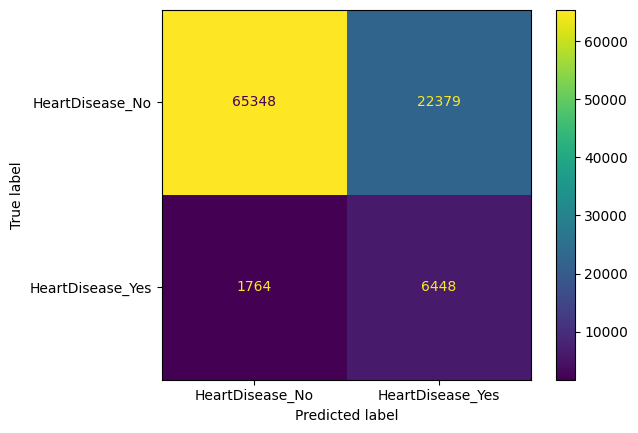

In [21]:
# Confusion Matrix 시각화

label=['HeartDisease_No', 'HeartDisease_Yes'] # 라벨 설정
plot = ConfusionMatrixDisplay(confusion_matrix = cm, 
                             display_labels=label) 
plot.plot()
plt.show()

In [22]:
# 정확도, 오분류율, 정밀도, 민감도, 특이도, f-1스코어 산출

# 정확도
accuracy = model.score(X_test, y_test)
print('정확도:{:.3f}'.format(accuracy))

# 오분류율
error_rate = 1-model.score(X_test, y_test)
print('오분류율:{:.3f}'.format(error_rate))

# 정밀도
precision = precision_score(y_test, y_predict)
print('정밀도:{:.3f}'.format(precision))

# 민감도(재현율)
recall = recall_score(y_test, y_predict)
print('민감도:{:.3f}'.format(recall))

# 특이도
TN = cm_df['Predicted Class-0'].loc['True Class-0']
FP = cm_df['Predicted Class-1'].loc['True Class-0']
print('특이도:{:.3f}'.format(TN/(TN+FP)))

# f1-스코어
f1 = f1_score(y_test, y_predict)
print('f1-스코어:{:.3f}'.format(f1))

정확도:0.748
오분류율:0.252
정밀도:0.224
민감도:0.785
특이도:0.745
f1-스코어:0.348


In [23]:
# 향상도 테이블 생성

# 예측 스코어 산출 및 결합
probability = model.predict_proba(X_test)
y_probability_df = pd.DataFrame(probability,
                                columns=['probability_0','probability_1'])
y_df = pd.concat([y_test.reset_index()['HeartDisease_Yes'],
                  y_probability_df['probability_1']], axis=1)

# 10분위 컬럼 생성
y_df['decile'] = pd.qcut(y_df['probability_1'],10,
                         labels=['10','9','8','7','6','5','4','3','2','1'])

# 향상도 테이블을 위한 변수 설정
y_all = y_df['HeartDisease_Yes'].sum() # 전체 1값 수
base_lift = y_df['HeartDisease_Yes'
                ].sum()/y_df['HeartDisease_Yes'].count() # 기본 향상도

# 분위수 별 집계
y_df_gb = y_df.groupby(['decile']).agg(
    {'HeartDisease_Yes':'sum','probability_1':'count'}).reset_index()
y_df_gb = y_df_gb.sort_values(by='decile' ,ascending=False)

# 향상도 테이블 요소 생성 및 후처리
y_df_gb['Sensitivity'] = y_df_gb['HeartDisease_Yes']/y_all
y_df_gb['Precision'] = y_df_gb['HeartDisease_Yes']/y_df_gb['probability_1']
y_df_gb['Lift'] = y_df_gb['Precision']/base_lift
y_df_gb = y_df_gb.rename(
    columns={'HeartDisease_Yes':'Frequency of Y=1','probability_1':'Decile count'})

y_df_gb

/tmp/ipykernel_33/1710059146.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  y_df_gb = y_df.groupby(['decile']).agg(


,decile,Frequency of Y=1,Decile count,Sensitivity,Precision,Lift
9,1,3478,9594,0.423527,0.362518,4.235221
8,2,1822,9594,0.221870,0.189910,2.218681
7,3,1145,9594,0.139430,0.119345,1.394286
6,4,720,9594,0.087677,0.075047,0.876757
5,5,463,9593,0.056381,0.048264,0.563862
4,6,230,9594,0.028008,0.023973,0.280075
3,7,156,9594,0.018997,0.016260,0.189964
2,8,94,9594,0.011447,0.009798,0.114465
1,9,56,9594,0.006819,0.005837,0.068192
0,10,48,9594,0.005845,0.005003,0.058450


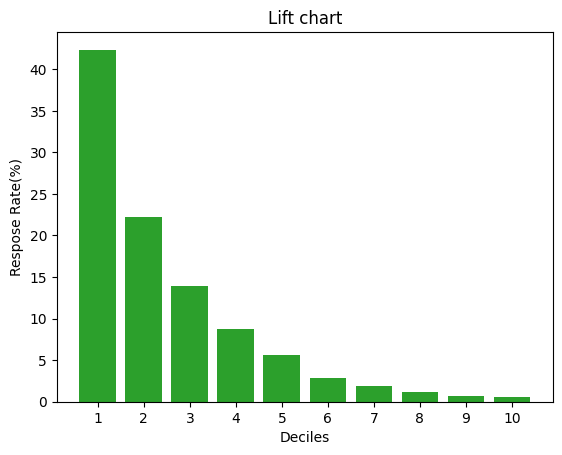

In [24]:
# 향상도 차트 생성

bar_x = np.arange(10)

plt.bar(bar_x, y_df_gb['Sensitivity']*100, color='C2')
plt.xticks(bar_x, y_df_gb['decile'])
plt.title("Lift chart")
plt.xlabel("Deciles")
plt.ylabel("Respose Rate(%)")

plt.show()

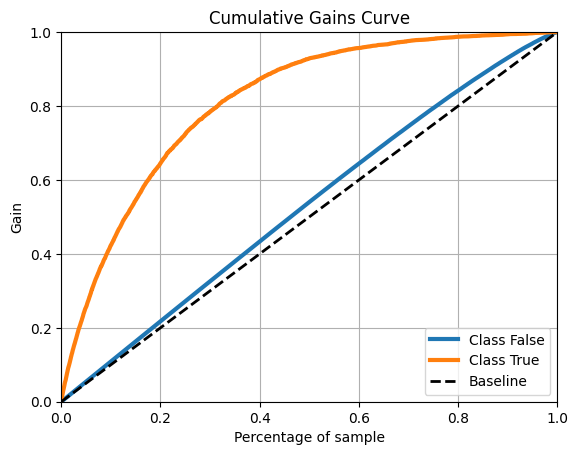

In [25]:
# 누적 향상도 곡선 생성

skplt.metrics.plot_cumulative_gain(y_test, probability)
plt.show()

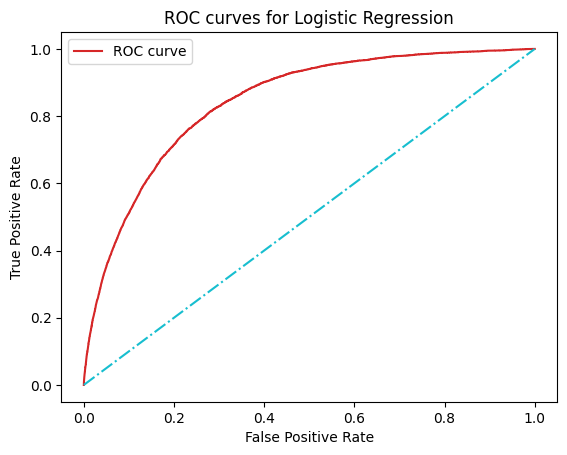

AUC 스코어:0.842


In [26]:
# ROC 커브 생성 및 AUC 스코어 산출

# 시각화 함수 설정
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='C3', label='ROC curve')
    plt.plot([0, 1], [0, 1], color='C9', linestyle='-.')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curves for Logistic Regression')
    plt.legend()
    plt.show()

# 예측 스코어 전처리 및 ROC 커브 생성
probability_cut = probability[:, 1]
fper, tper, thresholds = roc_curve(y_test, probability_cut)
plot_roc_curve(fper, tper)

# AUC 스코어 산출
auc_score = auc(fper, tper)
print('AUC 스코어:{:.3f}'.format(auc_score))

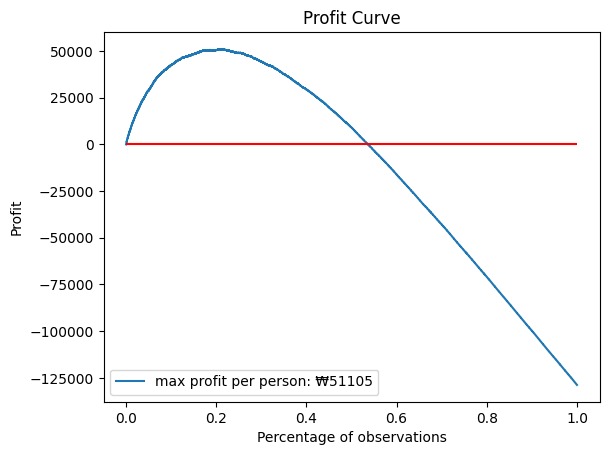

In [27]:
# 수익 곡선

# 수익, 비용 변수 정의
profit = 2000000
cost   = -300000

# 수익, 비용 Matrix 생성
profit_cost_matrix = np.array([[profit+cost, cost],[0,0]])

# 수익곡선 시각화를 위한 혼동행렬 재배열
def cm_for(y_true, y_pred):
    [[tn, fp], [fn, tp]] = metrics.confusion_matrix(y_true, y_pred)
    return np.array([[tp, fp], [fn, tn]])

# 예측 스코어 수준 별 예상 수익 값 산출
profits = []
for T in sorted(y_probability_df['probability_1'], reverse=True):
    y_pred_pf = (y_probability_df['probability_1'] > np.array(T)).astype(int)
    confusion_mat = cm_for(y_test, y_pred_pf)
    # 임계값에 대한 총 수익 계산
    profit = sum(sum(confusion_mat * profit_cost_matrix)) / len(y_test)
    profits.append(profit)
    
# 수익곡선 시각화
profit_max = max(profits)
plt.figure();
plt.plot(np.linspace(0, 1, len(y_test)), profits, 
         label = 'max profit per person: ₩{:.0f}'.format(profit_max))
plt.hlines(0,0,1,color="red")
plt.xlabel('Percentage of observations')
plt.ylabel('Profit')
plt.title('Profit Curve')
plt.legend(loc='lower left')
plt.show()

In [28]:
# precision @ k, recall @ k, MAP 산출 (단일 고객 데이터)

# 기존 추천 결과 데이터
actual = ['A','C','D','E','H','M','P','R','S','V'] # 실제 구매 품목
predicted = ['A','D','F','H','M','N','O','P','X','Z'] # 예측 구매 품목

####################### K 수 지정 #######################
k = 3 # 평가지표 산출에 사용할 item 수
#########################################################

r =[]
rs = [r]

# 예측과 실제 구매 매칭 리스트 생성
for p in predicted:
    if p in actual:
        r.append(1)
    else:
        r.append(0)

# precision @ k 산출 함수 설정
def precision_at_k(r, k):
    assert k >= 1 # 설정된 k가 1 이상인지 확인
    # 평가지표 산출에 사용할 결과지 item k개가 0이 아니면 True, 0이면 False
    r = np.asarray(r)[:k] != 0 # 결과지 item 수가 설정한 k개보다 적으면 error
    if r.size != k:
        raise ValueError('k setting error')
    return np.mean(r)

# recall @ k 산출 함수 설정
def recall_at_k(r, k):
    assert k >= 1
    all_r = np.sum(r)
    r = np.asarray(r)[:k] != 0
    if r.size != k:
        raise ValueError('k setting error')
    return np.sum(r)/all_r

# average precision 산출 함수 설정
def average_precision(r):
    r = np.asarray(r) != 0
    out = [precision_at_k(r, k + 1) for k in range(r.size) if r[k]]
    if not out:
        return 0.
    return np.mean(out)

# MAP 산출 함수 설정
def mean_average_precision(rs):
    return np.mean([average_precision(r) for r in rs])

# print(precision_at_k(r, k))
# print(recall_at_k(r, k))
# print(mean_average_precision(rs))
                         
print('precision @ k:{:.3f}'.format(precision_at_k(r, k)))
print('recall @ k:{:.3f}'.format(recall_at_k(r, k)))
print('MAP:{:.3f}'.format(mean_average_precision(rs)))

precision @ k:0.667
recall @ k:0.400
MAP:0.835


In [30]:
# precision @ k, recall @ k, MAP 산출 (여러 고객 데이터)


####################### K 수 지정 ####################### 
k = 3 # 평가지표 산출에 사용할 item 수
#########################################################

# 실제 구매 품목
actual = [['A','C','D','E','H','M','P','R','S','V'],
          ['A','B','C','F','H','M','O','R','T','V'],
          ['C','D','E','F','H','M','O','R','T','V']]

# 예측 구매 품목
predicted = [['A','D','F','H','M','N','O','P','X','Z'],
             ['T','M','D','O','I','X','H','B','A','J'],
             ['F','D','C','I','X','B','E','P','Y','Q']]

rs = []
rrs = [rs]

# 구매 품목 데이터 전처리
for n, items in enumerate(predicted):
    r = []
    for item in items:
        if item in actual[n]:
            r.append(1)
        else:
            r.append(0)
    rs.append(r)

# precision @ k 산출 함수 설정
def precision_at_k(rs, k):
    assert k >= 1   # 설정된 k가 1 이상인지 확인
    # 평가지표 산출에 사용할 결과 item k개가 0이 아니면 True, 0이면 False
    rs = np.asarray(rs)[:,:k] != 0 
    if rs.shape[1] != k: # 결과지 item 수가 설정한 k개보다 적으면 error
        raise ValueError('k setting error')
    return np.mean([np.mean(arr) for arr in rs])

# recall @ k 산출 함수 설정
def recall_at_k(rs, k):
    assert k >= 1
    rs = np.asarray(rs) != 0
    tmp = []
    for arr in rs:
        all_r = np.sum(arr)
        arr =  arr[:k] != 0 
        if arr.size != k:
            raise ValueError('k setting error')
        tmp.append(np.sum(arr)/all_r)
    return np.mean(tmp)

# average precision 산출 함수 설정
def average_precision(rs):
    rs = np.asarray(rs) != 0

    precision_li = []
    for arr in rs:
        tmp = []
        for k in range(arr.size):
            if arr[k]:
                tmp.append(np.mean(arr[:k+1] != 0))
        precision_li.append(np.mean(tmp))
        
    if not precision_li:
        return 0
    return np.mean(precision_li)

# MAP 산출 함수 설정
def mean_average_precision(rrs):
    return np.mean([average_precision(r) for r in rrs])

print('precision @ k:{:.3f}'.format(precision_at_k(rs, k)))
print('recall @ k:{:.3f}'.format(recall_at_k(rs, k)))
print('MAP:{:.3f}'.format(mean_average_precision(rrs)))

precision @ k:0.778
recall @ k:0.494
MAP:0.832
